# Introduction 4 TensorFlow
#### TensorFlow is a powerful library for numerical tensor calculations. It offers several advantages:
#### 1. You can perform calculations not only on CPUs but also on GPUs and TPUs, unlike NumPy.
#### 2. It automatically computes gradients for differentiation.
#### 3. Very good for parellel computation!

#### Therefore, many people(PyTorch?) use TensorFlow for machine learning tasks that involve numerous tensor calculations.
#### This introduction implements binary classification using the example code from 'Deep Learning with Python' (2022, Francois Chollet).

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Part 1 Basic Computation using Tensorflow
#### Like NumPy!

In [2]:
x = tf.ones(shape=(2,1)) # same as np.ones(shape=(2,1))
print(x)
x = tf.zeros(shape=(2,1)) # same as np.zeros(shape=(2,1))
print(x)
x = tf.random.normal(shape=(3,1), mean=0, stddev=1.) # same as np.random.normal(size=(3,1), loc=0, scale=1.)
print(x)
x = tf.random.uniform(shape=(3,1),minval=0.,maxval=1.) # same as np.random.uniform(size=(3,1),low=0.,high=1.)
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[ 0.29392403]
 [-0.62794113]
 [ 1.4481332 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.07388985]
 [0.00647998]
 [0.19449747]], shape=(3, 1), dtype=float32)


#### Unlike NumPy!

In [3]:
x = tf.ones(shape=(2,2))
x[0,0]=0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [4]:
# Initialization
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

# Assign all values
v_assign1 = v.assign(tf.ones((3,1)))
print(v_assign1)

# Assign one number
v_assign2 = v_assign1[0,0].assign(3.)
print(v_assign2)

# Add numbers
v_assign3 = v_assign2.assign_add(tf.ones((3,1)))
print(v_assign3)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.1995757 ],
       [ 1.2928643 ],
       [ 0.23334253]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


#### Basic althemetric calculation.

In [5]:
# Creating a 2x2 tensor 'a' filled with ones
a = tf.ones((2, 2))

# Squaring each element of tensor 'a' and storing it in tensor 'b'
b = tf.square(a)

# Taking the square root of each element of tensor 'a' and storing it in tensor 'c'
c = tf.sqrt(a)

# Adding tensors 'b' and 'c' element-wise and storing the result in tensor 'd'
d = b + c

# Performing matrix multiplication between tensors 'a' and 'b' and storing the result in tensor 'e'
e = tf.matmul(a, b)

# Element-wise multiplication of tensors 'e' and 'd', and storing the result in tensor 'e'
e *= d

# Part 2 GradientTape API

#### The GradientTape API is a core component of TensorFlow used for automatic differentiation, which is essential for training machine learning models through techniques like gradient descent.
#### The API allows you to compute gradients of tensors with respect to some other tensors, typically the model's parameters, which is crucial for updating the parameters during the training process.

In [6]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

#### Constant input instead of variable

In [7]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

#### Second-order gradient

In [8]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time **2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

# Part 3. Binarry Classifier using TensorFlow

#### First, we generate random points using the given covariance and mean vector.

In [9]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3],cov=[[1,0.5],[0.5,1]],size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0],cov=[[1,0.5],[0.5,1]],size=num_samples_per_class)

#### Making Input and Label

In [10]:
inputs  = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class,1), dtype="float32")))

In [11]:
print(targets[:,0])

[0. 0. 0. ... 1. 1. 1.]


#### Plot the answer!

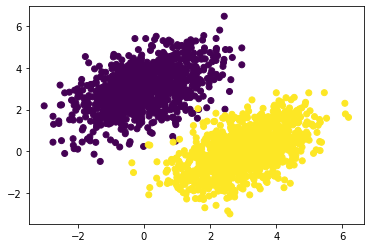

In [12]:
plt.scatter(inputs[:,0],inputs[:,1], c=targets[:,0])
plt.show()

#### Affine Transformation $\text{prediction}=W\cdot\text{input}+b$

In [13]:
input_dim  = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

#### Forwardpass function

In [14]:
def model(inputs):
    return tf.matmul(inputs, W)+ b

#### Mean Squared Error as Loss Function

In [15]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_losses)

#### Training step function

In [16]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[W,b])
    
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

#### Batch Training Loop

In [17]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step} {loss:4f}")

Loss at step 0 1.886617
Loss at step 1 0.227892
Loss at step 2 0.125126
Loss at step 3 0.104677
Loss at step 4 0.096011
Loss at step 5 0.089478
Loss at step 6 0.083717
Loss at step 7 0.078500
Loss at step 8 0.073755
Loss at step 9 0.069437
Loss at step 10 0.065508
Loss at step 11 0.061931
Loss at step 12 0.058677
Loss at step 13 0.055715
Loss at step 14 0.053020
Loss at step 15 0.050567
Loss at step 16 0.048334
Loss at step 17 0.046302
Loss at step 18 0.044453
Loss at step 19 0.042771
Loss at step 20 0.041239
Loss at step 21 0.039846
Loss at step 22 0.038577
Loss at step 23 0.037423
Loss at step 24 0.036373
Loss at step 25 0.035417
Loss at step 26 0.034547
Loss at step 27 0.033755
Loss at step 28 0.033034
Loss at step 29 0.032378
Loss at step 30 0.031782
Loss at step 31 0.031238
Loss at step 32 0.030744
Loss at step 33 0.030294
Loss at step 34 0.029885
Loss at step 35 0.029512
Loss at step 36 0.029173
Loss at step 37 0.028865
Loss at step 38 0.028584
Loss at step 39 0.028328


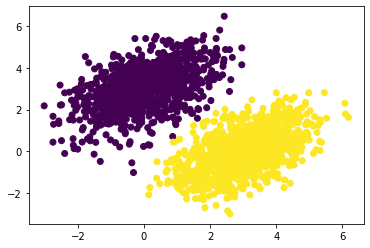

In [18]:
predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)
plt.show()

#### We found a linear function that divides the clusters!

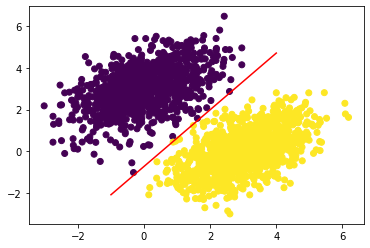

In [19]:
x = np.linspace(-1, 4, 100)
y = -W[0]/W[1]*x+(0.5-b)/W[1]
plt.plot(x,y, "-r")
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)
plt.show()